# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [2]:
import pickle
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)
print(train_test_index_dict)

{'train_index': [6914, 8332, 2791, 25106, 11135, 24667, 17806, 25963, 9915, 8994, 13636, 5549, 23229, 10371, 16618, 18480, 7943, 21225, 11262, 11648, 8155, 9368, 19936, 8083, 6122, 2994, 7960, 14536, 21716, 2200, 23441, 3157, 728, 14015, 12039, 3925, 21321, 12676, 1330, 1517, 12478, 20823, 15546, 8719, 19362, 23878, 581, 22649, 4046, 25419, 14805, 14254, 18461, 21107, 7717, 20676, 17548, 22053, 13985, 17399, 13462, 21006, 11720, 14037, 15591, 16001, 16167, 8725, 22280, 16528, 14056, 14723, 11239, 13893, 22314, 8562, 19913, 25693, 11292, 9216, 25676, 10837, 11490, 5713, 10523, 14606, 5458, 23303, 19400, 11665, 21757, 17438, 1779, 12292, 25538, 20682, 26374, 26634, 2809, 18530, 19996, 9708, 2091, 6652, 3082, 16330, 26136, 17355, 21364, 14707, 18816, 19887, 15551, 19401, 24305, 8551, 20669, 16873, 25017, 8433, 23016, 4144, 14752, 6705, 18934, 21685, 11570, 5177, 12913, 5247, 7653, 18439, 22474, 18481, 8411, 4202, 221, 12734, 22048, 25358, 15688, 23672, 3713, 21706, 17599, 9192, 14679, 416

In [3]:
import pandas as pd
data = pd.read_csv('product_reviews.csv')


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download the 'stopwords' resource
nltk.download('stopwords')

def preprocess_text(text):
    # convert text to lower-case
    text = text.lower()
    # remove punctuation marks and other non-word characters
    text = text.translate(str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))
    #remove numnbers
    words = text.split()
    text = ' '.join(word for word in words if not word.isdigit())   
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # instantiate PorterStemmer
    stemmer = PorterStemmer()
    # apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

data['text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
train_indices=train_test_index_dict['train_index']
test_indices=train_test_index_dict['test_index']

# Split the data into train and test sets
train_data = data.loc[train_indices]
test_data = data.loc[test_indices]

#Extracting the features and labels  from the train and test data
X_train = train_data['text']
Y_train = train_data['stars']
X_test = test_data['text']
Y_test = test_data['stars']

vectorizer = CountVectorizer(stop_words='english')  # Adjust the value based on your dataset
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)



(17862, 19606)
(8799, 19606)


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

# make predictions

Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))



              precision    recall  f1-score   support

         1.0       0.73      0.74      0.74      1149
         2.0       0.47      0.08      0.14       587
         4.0       0.47      0.49      0.48      1981
         5.0       0.78      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.54      0.54      8799
weighted avg       0.69      0.70      0.68      8799



### TF-IDF Classification Report:

- **Precision:**
  - Class 1 (1.0) has a precision of 0.90, indicating high precision for positive predictions in class 1.
  - Class 2 (2.0) has very low precision (0.00), indicating that almost all predicted positive instances are incorrect.

- **Recall:**
  - Class 5 (5.0) has a recall of 1.00, indicating that all actual positive instances for class 5 were predicted correctly

- **Accuracy:**
  - Overall accuracy is 0.60, which is the proportion of correctly classified instances out of the total instances.


Precision : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
Model has the highest precision of 0.83 for class 5. This means that 83% of the reviews that the model has predicted as class 5 are actually class 5.
Model has lowest precision of 0.42 for class 2. This means that only 42% of the reviews that the model has predicted as class 2 are actually class 2.

Recall : It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
Model has the highest recall of 0.74 for class 5. This means that 74% of the reviews that are actually class 5 are predicted as class 5 by the model.
Model has lowest recall of 0.43 for class 2. This means that only 43% of the reviews that are actually class 2 are predicted as class 2 by the model.

Overall Accuracy : 0.68

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_2=TfidfVectorizer(stop_words='english')
X_train_2=vectorizer_2.fit_transform(train_data['text'])
X_test_2=vectorizer_2.transform(test_data['text'])

# Train a Naive Bayes classifier
classifier_2 = MultinomialNB()
classifier_2.fit(X_train_2, Y_train)

# make predictions
Y_pred_2 = classifier_2.predict(X_test_2)
print(classification_report(Y_test, Y_pred_2))


              precision    recall  f1-score   support

         1.0       0.90      0.13      0.23      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.55      0.01      0.03      1981
         5.0       0.59      1.00      0.74      5082

    accuracy                           0.60      8799
   macro avg       0.51      0.29      0.25      8799
weighted avg       0.58      0.60      0.46      8799



C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [8]:
print(data.shape)

(26661, 3)


### TF-IDF Classification Report:

- **Precision:**
  - Class 1 (1.0) has a precision of 0.90, indicating high precision for positive predictions in class 1.
  - Class 2 (2.0) has very low precision (0.00), indicating that almost all predicted positive instances are incorrect.

- **Recall:**
  - Class 5 (5.0) has a recall of 1.00, indicating that all actual positive instances for class 5 were predicted correctly.
  - Classes 1 (1.0), 2 (2.0), and 4 (4.0) have lower recall values, suggesting that the model tends to miss predicting positive instances for these classes.

- **F1-Score:**
  - The weighted average F1-score for the model is 0.46, which is lower than the BoW model. It indicates a trade-off between precision and recall.

- **Accuracy:**
  - Overall accuracy is 0.60, which is the proportion of correctly classified instances out of the total instances.


### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [10]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)
print(embeds)

(26661, 1024)
[[ 0.50699836  0.61128891 -0.2719104  ...  1.0390445  -0.80041009
   0.73497975]
 [-0.02217656 -0.1527285  -0.55813098 ...  0.18087101  0.16279726
  -0.41220728]
 [ 0.52932245  0.60723621 -0.25953016 ...  1.0670861  -0.75681108
   0.69999683]
 ...
 [-0.05420208 -0.14062414 -0.55579591 ...  0.12184423  0.12340328
  -0.31265116]
 [-0.02863726 -0.14980018 -0.55721784 ...  0.17685497  0.16171496
  -0.39407209]
 [-0.02447684 -0.15692814 -0.55817062 ...  0.17620397  0.16273451
  -0.39889568]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [12]:
def within_cluster_sum_of_squares(data,kmax):
    wcss = []
    iterations=[]
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k,random_state=42,n_init='auto')
        kmeans.fit(data)
        iterations.append(kmeans.n_iter_)
        wcss.append(kmeans.inertia_)
    return wcss,iterations

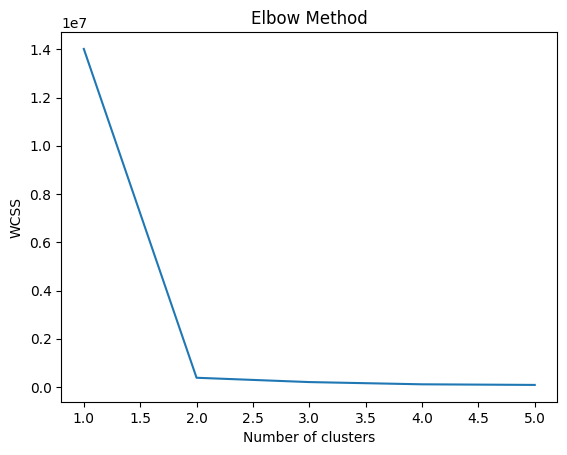

Iterations Required for each K:  [2, 2, 3, 10, 27]


In [13]:
kmax=5
wcss,iterations = within_cluster_sum_of_squares(embeds,kmax)
plt.plot(range(1, kmax+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("Iterations Required for each K: ",iterations)


In [ ]:
print("Values of WCSS for different number of clusters: ",wcss)


Values of WCSS for different number of clusters:  [14015419.042626815, 383779.78270260454, 204916.6213998474, 112261.47874445136, 86921.53297653403]


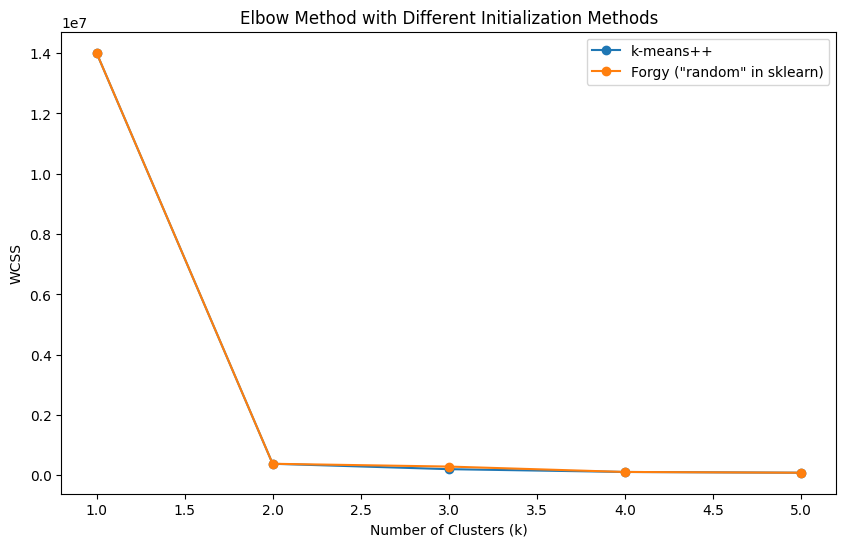

In [14]:
def within_cluster_sum_of_squares_2(data, kmax, init_method='random'):
    wcss = []
    iterations=[]
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k, random_state=42, init=init_method,n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        iterations.append(kmeans.n_iter_)
    return wcss,iterations

kmax = 5 
wcss_kmeans_pp,iterations_pp = within_cluster_sum_of_squares_2(embeds, kmax, init_method='k-means++')

wcss_forgy,iterations_forgy = within_cluster_sum_of_squares_2(embeds, kmax, init_method='random')

# Plot the elbow curves for both initialization methods
plt.figure(figsize=(10, 6))

plt.plot(range(1, kmax+1), wcss_kmeans_pp, label='k-means++', marker='o')
plt.plot(range(1, kmax+1), wcss_forgy, label='Forgy ("random" in sklearn)', marker='o')

plt.title('Elbow Method with Different Initialization Methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.legend()
plt.show()


In [15]:
print(iterations_pp)

[2, 2, 3, 10, 27]


Purity : basically each cluster gets the class that is most frequent in that cluster. Formula is 
1/n * sum(max(Purity(Ci)) for i in range(1, k)) where Ci is the cluster and k is the number of clusters.
basically for each cluster you need to count maximum class vale kitne hain.
if nice clsutering then pruity will be high, tending to 1 approx



Rand Index : 
TP: True Positive, two similar document unto the same cluster'TN: True Negative, two dissimilar documents into different clusters
FP: False Positive, two dissimilar documents into the same cluster
FN: False Negative, two similar documents into different clusters
Rand Index = (TP + TN) / (TP + FP + FN + TN)

In [ ]:
import numpy as np

# Example array
a = np.array([1, 3, 5, 5, 2, 5, 8])

# Find the mode (most frequently occurring element) and its count
mode = np.argmax(np.bincount(a))
count_mode = np.sum(a == mode)

print(f"Mode: {mode}, Frequency: {count_mode}")


Mode: 5, Frequency: 3


In [24]:
def calculate_purity(data,k,ground_labels,cluster_assignments):
    cluster_dict = {cluster: [] for cluster in range(k)}

    for i in range(len(ground_labels)):
        cluster_dict[cluster_assignments[i]].append(ground_labels[i])
    
 
    purity = 0
    for cluster in cluster_dict:
        cluster_labels = cluster_dict[cluster]
        mode = np.argmax(np.bincount(cluster_labels))
        count_mode = np.sum(cluster_labels == mode)
        purity += count_mode
    
    purity = purity / len(ground_labels)
    return purity


In [25]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++',n_init=1)
kmeans.fit(embeds)
cluster_assignments = kmeans.predict(embeds)
ground_labels=data['stars']
ground_labels = ground_labels.to_numpy()
# to int
ground_labels = ground_labels.astype(int)
print(calculate_purity(data,k,ground_labels,cluster_assignments))



0.70683770301189


In [ ]:
def calculate_rand_index_lengthy(true_labels, predicted_labels):
    n = len(true_labels)
    tp, tn, fp, fn = 0, 0, 0, 0

    for i in range(n):
        for j in range(i + 1, n):
            same_cluster_true = true_labels[i] == true_labels[j]
            same_cluster_predicted = predicted_labels[i] == predicted_labels[j]

            if same_cluster_true and same_cluster_predicted:
                tp += 1
            elif not same_cluster_true and not same_cluster_predicted:
                tn += 1
            elif same_cluster_true and not same_cluster_predicted:
                fn += 1
            elif not same_cluster_true and same_cluster_predicted:
                fp += 1
            print(i,j)

    rand_index = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

    return rand_index


In [36]:
import numpy as np
from scipy.special import comb
def rand_index_score(clusters, classes):
    postiives_combination = comb(np.bincount(clusters), 2)
    tp_fp= postiives_combination.sum()
    same_class = comb(np.bincount(classes), 2)
    tp_fn= same_class.sum()
    unique_clusters = np.unique(clusters)
    tp = 0
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        actual=classes[cluster_indices]
        different_class = comb(np.bincount(actual), 2)
        tp += different_class.sum()
    fp = tp_fp - tp
    fn = tp_fn - tp
    tn = comb(len(classes), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [38]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++',n_init=1)
kmeans.fit(embeds)
cluster_assignments = kmeans.predict(embeds)
ground_labels=data['stars']
ground_labels = ground_labels.to_numpy()
# to int
ground_labels = ground_labels.astype(int)
print(rand_index_score(cluster_assignments,ground_labels))

# verify from inbuilt
from sklearn.metrics import rand_score
print(rand_score(ground_labels, cluster_assignments))


0.7166146240059509
0.7166146240059509


In [35]:
clusters=[0,1,2,1,2]
classes=[3,2,1,1,2,0]

# total positive + false positive
# print(np.bincount(clusters))
# print(comb(np.bincount(clusters), 2))
# print(comb(np.bincount(classes), 2).sum())
A = np.c_[(clusters, classes)]
# see what A is like by iteratins
#  two same document : same clsuter and different cluster : comb from the classes , tp+fn
# #  for total postive you go inside the clister and take combination of numner in same cluster
# // 0 : 2 time 3 and 3 times 4  then 2c2 + 3c2

# tp=


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 1 has size 6

In [ ]:
def calculate_nmi_nw(arr1,arr2):
    joint_prob_matrix=np.zeros((len(np.unique(arr1)),max(arr2)+1))
    for i in range(len(arr1)):
        joint_prob_matrix[arr1[i],arr2[i]]+=1
    joint_prob_matrix=joint_prob_matrix/len(arr1)

    marginal_prob_arr1=np.sum(joint_prob_matrix,axis=1)
    marginal_prob_arr2=np.sum(joint_prob_matrix,axis=0)

    entropy_arr1=0
    entropy_arr2=0

    entropy_arr1=-np.sum(marginal_prob_arr1*np.log2(marginal_prob_arr1))
    entropy_arr2=-np.sum(marginal_prob_arr2*np.log2(marginal_prob_arr2))

    mutual_info=0
    for i in range(len(np.unique(arr1))):
        for j in range(len(np.unique(arr2))):
            if joint_prob_matrix[i,j]>0:
                mutual_info+=joint_prob_matrix[i,j]*np.log2(joint_prob_matrix[i,j]/(marginal_prob_arr1[i]*marginal_prob_arr2[j]))
    
    nmi=mutual_info/((entropy_arr1+entropy_arr2)/2)

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++',n_init=1)
kmeans.fit(embeds)
cluster_assignments = kmeans.predict(embeds)
ground_labels=data['stars']
ground_labels = ground_labels.to_numpy()
# to int
ground_labels = ground_labels.astype(int)
print(ground_labels)
print(cluster_assignments)
print(calculate_purity(data,k,ground_labels,cluster_assignments))
print(rand_index_score(cluster_assignments,ground_labels))

# verify using inbuilt function

from sklearn.metrics import rand_score


print(rand_score(ground_labels, cluster_assignments))





[1 5 1 ... 4 5 5]
[1 0 1 ... 0 0 0]
0.70683770301189
0.7166146240059509
0.7166146240059509


NMI : Normalized Mutual Information, it basically calculates the mutual information between the two arrays. Say two arrays U and V then if some 1,2,3 point belong to one cluster in array U and 4th point belong to other cluster , then in V also if same trend follow we will output 1